In [1]:
from tlab import *
import numpy as np

In [ ]:
H = np.random.rand(100000,100000)
H = H + H.T

In [23]:
AH = AH[1:,1:]

In [15]:
result = davidson(H, nroots=2, verbose=1)

Found full matrix H
Dimension of H: 10000
Initial guess estimated as: 8645, 8636
Cycle    State       Energy        Grad      Time(s)
[  0]        0:  -0.5760113191   4.08e+01  
             1:  +0.5777772168   1.47e+02  
Timing (sec)
  sigma-vector:       0.01   subspace:       0.00   update:       0.02
[  1]        0:  -38.1229823189   3.80e+01  
             1:  -1.5823804396   5.23e+01  
Timing (sec)
  sigma-vector:       0.01   subspace:       0.00   update:       0.01
[  2]        0:  -52.4645240701   2.58e+01  
             1:  -19.5991798535   4.56e+01  
Timing (sec)
  sigma-vector:       0.01   subspace:       0.00   update:       0.02
[  3]        0:  -63.0784848707   1.67e+01  
             1:  -47.9572805629   2.56e+01  
Timing (sec)
  sigma-vector:       0.01   subspace:       0.00   update:       0.01
[  4]        0:  -68.6763080507   1.27e+01  
             1:  -61.2303300694   1.85e+01  
Timing (sec)
  sigma-vector:       0.01   subspace:       0.00   update:       0.02

In [10]:
C = result.M
C0 = C.T[0]
C1 = C.T[1]
C0 = C0.reshape(81,1)
C1 = C1.reshape(81,1)

ValueError: cannot reshape array of size 100 into shape (81,1)

In [32]:
S0 = S @ C0
S1 = S @ C1
S00 = S0 @ S0.T
S11 = S1 @ S1.T
calS = S - S00 - S11

In [28]:
zerosC = np.zeros(81).reshape(81,1)
zerosO = np.zeros(80).reshape(80,1)

y0 = np.block([[zerosO], [C0], [zerosC]])

In [75]:
Hc1c1 = AH[80:161, 80:161]
Hc2c2 = AH[161:, 161:]
#sns.heatmap(AH[80:161,161:])

In [76]:
result_c1 = davidson(Hc1c1, nroots=2)
result_c1.M

Dimension of H: (81, 81)
Initial guess estimated as: 0, 10
Cycle  State       Energy      Grad
[ 0]      0:  +0.2034294619   6.38e-01  
          1:  +0.5749982381   6.32e-01  
[ 1]      0:  +0.0160320993   1.42e-01  
          1:  +0.2556375440   1.04e-01  
[ 2]      0:  +0.0042827583   6.66e-02  
          1:  +0.2330783604   1.62e-01  
[ 3]      0:  +0.0013917823   3.81e-02  
          1:  +0.1754992050   1.39e-01  
[ 4]      0:  +0.0004717276   2.16e-02  
          1:  +0.1485748688   2.01e-01  
[ 5]      0:  +0.0001385125   1.86e-02  
          1:  +0.1013199959   2.49e-01  
[ 6]      0:  +0.0000359494   8.81e-03  
          1:  +0.0458846253   2.29e-01  
[ 7]      0:  +0.0000101312   4.07e-03  
          1:  +0.0081264305   1.51e-01  
[ 8]      0:  +0.0000014281   2.97e-03  
          1:  +0.0023155833   4.88e-02  
[ 9]      0:  +0.0000004444   7.13e-04  
          1:  +0.0003583136   3.87e-02  
[10]      0:  +0.0000000840   7.25e-04  
          1:  +0.0001129494   1.23e-02  
[11

array([[ 6.69035894e-01,  6.54794108e-01],
       [ 3.40064289e-09, -4.67529826e-09],
       [-8.90439353e-04,  2.55253402e-03],
       [-9.09289096e-04, -2.61832485e-03],
       [ 1.53923596e-03, -1.56267198e-03],
       [ 9.21766396e-06, -8.48540484e-04],
       [-1.47633639e-08,  1.50512707e-08],
       [-2.32771111e-04,  3.08945358e-04],
       [ 3.22549432e-08, -3.29707104e-08],
       [-1.58695190e-07,  2.04655059e-07],
       [ 2.43313944e-01, -2.70547501e-01],
       [-1.07787392e-01,  1.20633532e-01],
       [-1.71545452e-01,  2.70537804e-01],
       [-5.41877426e-02,  4.73818778e-02],
       [-7.74085882e-08, -1.10367147e-07],
       [ 1.42029958e-01, -6.46934922e-02],
       [-1.40854370e-07,  1.40768552e-07],
       [-3.78256367e-09,  4.32868898e-08],
       [ 6.98708918e-02, -7.20367749e-02],
       [ 1.65765280e-02,  7.32998959e-02],
       [-5.32009331e-02,  7.10434854e-02],
       [-2.34685953e-02,  1.42359120e-02],
       [-1.69361077e-07,  1.04112156e-07],
       [ 3.

In [34]:
E, V = np.linalg.eigh(AH)

In [103]:
# null: 4 null vectors of AH 
null0 = V.T[0]
null1 = V.T[3]
null2 = V.T[2]
null3 = V.T[1]
null0 = null0.reshape(242,1)
null1 = null1.reshape(242,1)
null2 = null2.reshape(242,1)
null3 = null3.reshape(242,1)
null, range = nullspace(AH, eps=1e-6)

<Axes: >

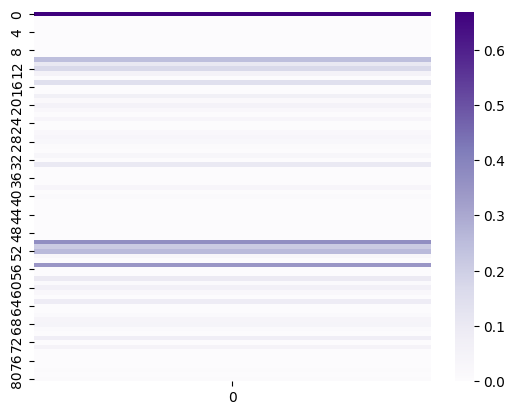

In [80]:
import seaborn as sns
sns.heatmap(abs(n0), cmap='Purples')


In [104]:
# block 4 null vectors of AH 
n0 = null0[80:161] #Hc1c1
n1 = null1[80:161] #Hc1c1
n2 = null2[161:]   #Hc2c2
n3 = null3[161:]   #Hc2c2

In [105]:
np.linalg.norm(n0)

np.float64(0.9999999999438166)

In [106]:

print(np.linalg.norm(Hc1c1@n0))
print(np.linalg.norm(Hc1c1@n1))
print(np.linalg.norm(Hc1c1@n2))
print(np.linalg.norm(Hc1c1@n3))

print(np.linalg.norm(Hc2c2@n0))
print(np.linalg.norm(Hc2c2@n1))
print(np.linalg.norm(Hc2c2@n2))
print(np.linalg.norm(Hc2c2@n3))

1.8503804674236036e-06
2.4445418847589703e-06
1.7412841633074107e-06
5.874067717182319e-07
1.5114469117878398e-06
1.931594516970035e-06
1.239741232105121e-06
2.0402698441915462e-07


In [109]:
[[n0.T @ S @ n0, n0.T @ S @ n1], [n0.T @ S @ n1, n1.T@ S @ n1]]

[[array([[1.01124605]]), array([[-0.02357285]])],
 [array([[-0.02357285]]), array([[1.01392578]])]]

In [147]:
n0n1, _ = nullspace(Hc1c1,1e-6)
n2n3, _ = nullspace(Hc2c2,1e-6)

In [163]:
np.linalg.det(C0C1.T @  C0C1)

np.float64(0.9999999999999999)

In [159]:
C0 = C0 / np.linalg.norm(C0)
C1 = C1 / np.linalg.norm(C1)
C1 = C1 - C0 @ C0.T @ C1
C1 = C1 / np.linalg.norm(C1)

In [164]:
C0C1

array([[-9.35193608e-01,  4.21563594e-02],
       [ 8.02246815e-08, -5.20662139e-07],
       [-1.03764478e-03,  2.49683247e-03],
       [ 2.42269549e-03, -1.34612548e-03],
       [-1.06678667e-04, -2.19099659e-03],
       [ 5.58595038e-04, -6.38499536e-04],
       [ 1.90811859e-05, -2.35303085e-04],
       [-1.71895872e-05,  2.03491407e-04],
       [ 1.93487069e-05, -2.30701276e-04],
       [-2.80819952e-07,  7.03778449e-08],
       [-1.03963614e-03, -3.63866086e-01],
       [-6.26941336e-05,  1.61773835e-01],
       [-5.24549035e-02,  3.16013502e-01],
       [ 8.81089193e-03,  7.14389355e-02],
       [ 3.79945655e-02,  8.65198860e-02],
       [-3.28798785e-02, -7.48763936e-02],
       [ 3.75928588e-02,  8.56082174e-02],
       [-7.02319049e-07, -9.12671139e-07],
       [-4.06732050e-03, -1.00272942e-01],
       [-6.12141645e-02,  4.35876745e-02],
       [-7.69702966e-03,  8.84219384e-02],
       [ 8.00332764e-03,  2.62563912e-02],
       [ 7.06277648e-03,  2.53022540e-02],
       [-6.

In [160]:
C0C1 = np.block([C0,C1])
n0n1 = np.block([n0,n1])
n2n3 = np.block([n2,n3])

In [143]:
n0n1.T @ n0n1

array([[1.00000000e+00, 4.29670203e-11],
       [4.29670203e-11, 9.99999997e-01]])

In [138]:
np.linalg.eigh(Hc2c2)

EighResult(eigenvalues=array([1.61659955e-08, 3.40026527e-08, 9.33623321e-02, 1.10103379e-01,
       1.16721169e-01, 1.26989680e-01, 1.38676362e-01, 1.56304270e-01,
       1.81035340e-01, 1.83020184e-01, 1.96148955e-01, 2.03166428e-01,
       2.04291386e-01, 2.04754559e-01, 2.24425333e-01, 2.31110819e-01,
       2.41511798e-01, 2.43541690e-01, 2.51085325e-01, 2.52524911e-01,
       2.56670258e-01, 2.70081952e-01, 2.88617019e-01, 2.89543815e-01,
       3.04527080e-01, 3.09150300e-01, 3.13433718e-01, 3.20495550e-01,
       3.20989385e-01, 3.25650235e-01, 3.39871517e-01, 3.40614436e-01,
       3.65079927e-01, 3.88135536e-01, 3.97031120e-01, 4.06609373e-01,
       4.27917219e-01, 4.51727381e-01, 5.70879599e-01, 8.30732554e-01,
       9.21184695e-01, 9.25940375e-01, 9.58837706e-01, 9.95298424e-01,
       1.00248163e+00, 1.00937606e+00, 1.06087178e+00, 1.06723213e+00,
       1.13218321e+00, 1.25500291e+00, 1.29230864e+00, 1.30536486e+00,
       1.35639481e+00, 1.36034667e+00, 1.43435236e+00,